In [1]:
#! pip install nltk
#! pip install emot
#! pip install wordcloud
#! pip install ko-ww-stopwords

In [2]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#Korean stopwords
# from ko_ww_stopwords.stop_words import ko_ww_stop_words 
# from ko_ww_stopwords.tools import is_stop_word, strip_outer_punct

from wordcloud import STOPWORDS, WordCloud
from emot.emo_unicode import UNICODE_EMOJI
import pandas as pd

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [3]:

lemmatizer = WordNetLemmatizer()
# kor_stop_words = list(ko_ww_stop_words)
emoji = list(UNICODE_EMOJI.keys())

def clean_text(text):
    #changing to lowercase
    text = text.lower()
    
    #removing #'s
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)    
#     # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+','',text)
    #removing punctuatuon and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    #tokenizing words and removing stop words from text
    tokens = word_tokenize(text)
#     filtered_words = [w for w in tokens if w not in kor_stop_words]
    filtered_words = [w for w in tokens if w not in emoji]
    #lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text


In [4]:
df = pd.read_csv("./bugs_database/merged/20022492_merged.csv")
df['Lyric'] = df['Lyric'].apply(clean_text)


In [5]:
manual_sw = ["n't", '내', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야'
             '널', '네', '니가', '네가', '널', '너를', '넌', '내게',
            'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', ' s', 's ', ' s ']
#넌 난 어쩌구저쩌구 하는 것 부터가 사랑 노래라는 것을 시사하지 않나..

# stop2.extend(manual_sw_list)

df['Lyric'] = df['Lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (manual_sw)]))


In [6]:
#전체 가사 합치기 -> 전반적인 정서는 무엇인가?
new = " ".join(cat for cat in df.Lyric)
new

"[ kick in the door waving the coco 팝콘이나 챙겨 껴들 생각 말고 i talk that talk runway i walk walk 눈 감고 pop pop 안 봐도 척 one by one then two by two 손끝 툭 하나에 다 무너지는 중 가짜 쇼 치곤 화려했지 make no sense you could get dollar outta me 자 오늘 밤이야 독을 품은 꽃 혼을 빼앗은 다음 look what you made u do 천천히 잠재울 fire 잔인할 만큼 아름다워 i bring the pain like this that pink venom this that pink venom this that pink venom get 'em , get 'em , get 'em straight to ya dome like whoa whoa whoa straight to ya dome like taste that pink venom taste that pink venom taste that pink venom get 'em , get 'em , get 'em straight to ya dome like whoa whoa whoa straight to ya dome like black paint and ammo , got body like rambo rest in peace , please light up candle this da life of vandal , masked up and i 'm still in celine designer crime or it would be me diamond shinin ' drive in silence i do mind it i 'm ridin ' flyin ' private side by side with da pilot up in the sky and i 'm wildin ' , stylin ' on them and there 's no chance cuz we got body on body 

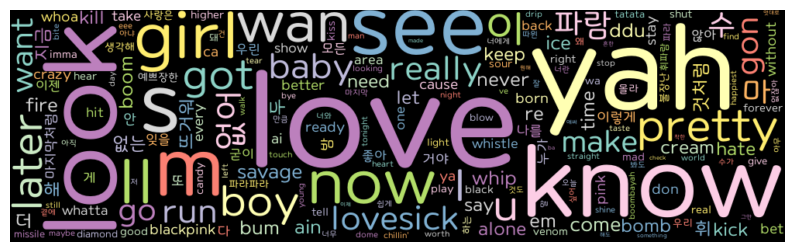

In [7]:

# mask = np.array(Image.open("./05.png"))
# 밑에 mask = mask 넣기, background_color="rgba(255, 255, 255, 0)", mode="RGBA"


word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 300, 
colormap='Set3', max_words=200, collocations = False).generate(new)


plt.figure(figsize = (10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# wan - want / wanna